In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.metrics import homogeneity_score,completeness_score, rand_score

import seaborn as sb

In [2]:
data=pd.read_csv('iris.csv')
data.shape

(150, 5)

In [3]:
df=data
data = data.drop('species',axis=1)


In [4]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
datacmp = data.iloc[:,[1,2]].values

In [6]:
# aplicar el método k-medoids 
kmedoids = KMedoids(n_clusters=3, random_state=42)
y_kmedoids=kmedoids.fit_predict(datacmp)

labels = kmedoids.labels_

# agregar las etiquetas de cluster al DataFrame
data['cluster'] = labels


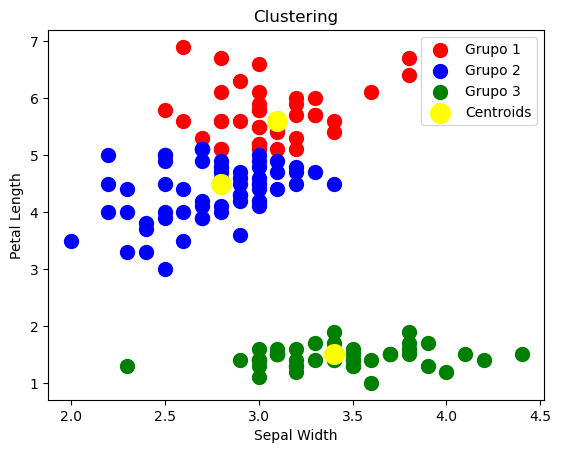

In [7]:
plt.scatter(datacmp[y_kmedoids == 0, 0], datacmp[y_kmedoids == 0, 1], s = 100, c = 'red', label = 'Grupo 1')
plt.scatter(datacmp[y_kmedoids == 1, 0], datacmp[y_kmedoids== 1, 1], s = 100, c = 'blue', label = 'Grupo 2')
plt.scatter(datacmp[y_kmedoids == 2, 0], datacmp[y_kmedoids== 2, 1], s = 100, c = 'green', label = 'Grupo 3')
plt.scatter(kmedoids.cluster_centers_[:, 0], kmedoids.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')
plt.title('Clustering')
plt.xlabel('Sepal Width')
plt.ylabel('Petal Length')
plt.legend()
plt.show()

In [8]:
homogeneidad = homogeneity_score(df['species'], labels)
print("1) Cluster homogeneity = ",homogeneidad)

completitud = completeness_score(df['species'], labels)
print("2) Cluster completeness = ",completitud)

randscore = rand_score(df['species'], labels)
print("3) Rand Score = ",randscore)

1) Cluster homogeneity =  0.8253232267695326
2) Cluster completeness =  0.8377266138201652
3) Rand Score =  0.9123937360178971


In [9]:
features = ['sepal_width','petal_length']
datacmp_meanshift = data[features]

bandwidth = estimate_bandwidth(datacmp_meanshift,quantile=0.19)
meanshift = MeanShift(bandwidth=bandwidth,bin_seeding=True)
meanshift.fit(datacmp_meanshift)

cluster_centers = meanshift.cluster_centers_
labelsMean = meanshift.labels_

datacmp_meanshift['cluster_meanshift'] = labelsMean

C:\Users\Antonio\AppData\Local\Temp\ipykernel_3256\4271341595.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datacmp_meanshift['cluster_meanshift'] = labelsMean


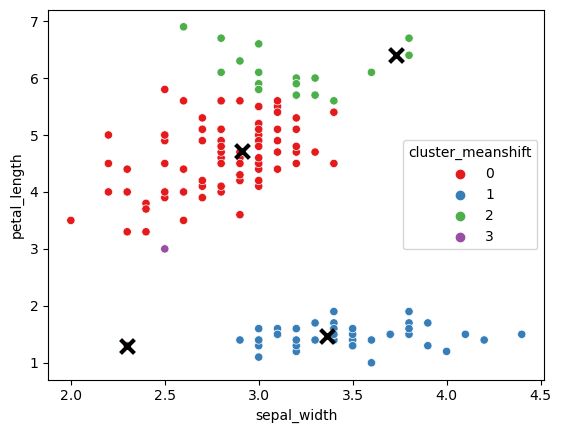

In [10]:
sb.scatterplot(x='sepal_width',y='petal_length',data = datacmp_meanshift,hue='cluster_meanshift',palette="Set1")
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', color='k', s=100, linewidths=3, zorder=10)


plt.show()

In [11]:
homogeneidad = homogeneity_score(df['species'], labelsMean)
print("1) Cluster homogeneity = ",homogeneidad)

completitud = completeness_score(df['species'], labelsMean)
print("2) Cluster completeness = ",completitud)

randscore = rand_score(df['species'], labelsMean)
print("3) Rand Score = ",randscore)

1) Cluster homogeneity =  0.6674858045689557
2) Cluster completeness =  0.7189138524168378
3) Rand Score =  0.8025055928411633
